In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch


In [26]:
predictions_csv = os.listdir('predictions')

In [27]:
predictions_dict = {i: [os.path.join('predictions',file) for file in predictions_csv if file.endswith(f"{i}.csv")] for i in range(8)}

In [28]:
class predictions_file():
    def __init__(self, file) -> None:
        self.file = file
        
        self.df = pd.read_csv(self.file)

        self.test_df = self.df.loc[self.df['partition'] == 'test']
        
        self.test_monomer = self.test_df['SMILES+Molar'].unique()[0].split(' (')[0]

In [29]:
def analyze_files(files):
    test_sets = [predictions_file(file).test_df for file in files]
    df = pd.concat(test_sets)
    predictions_dict_overview = {i: {} for i in df['SMILES+Molar'].unique()}

    for name in df['SMILES+Molar'].unique():
        df_part = df.loc[df['SMILES+Molar'] == name]

        true_value = df_part['rate_bin'].unique()[0]

        predictions = df_part['prediction'].tolist()

        accuracy = predictions.count(true_value) / len(predictions)

        predictions_dict_overview[name].update({'true': true_value,
                                                'predictions':predictions,
                                                'accuracy': accuracy})
    return predictions_dict_overview


In [30]:
def get_accuracy_color(acc):
    if acc == 5/5:
        color = 'darkgreen'
    elif acc == 4/5:
        color = 'forestgreen'
    elif acc == 3/5:
        color = 'gold'
    elif acc == 2/5:
        color = 'orange'
    elif acc == 1/5:
        color = 'maroon'
    elif acc == 0/5:
        color = 'red'
    else:
        color = 'blue'
    return color

/tmp/ipykernel_3154242/1292517216.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('polyrate_leaveOneSetOut.pdf', bbox_inches='tight')


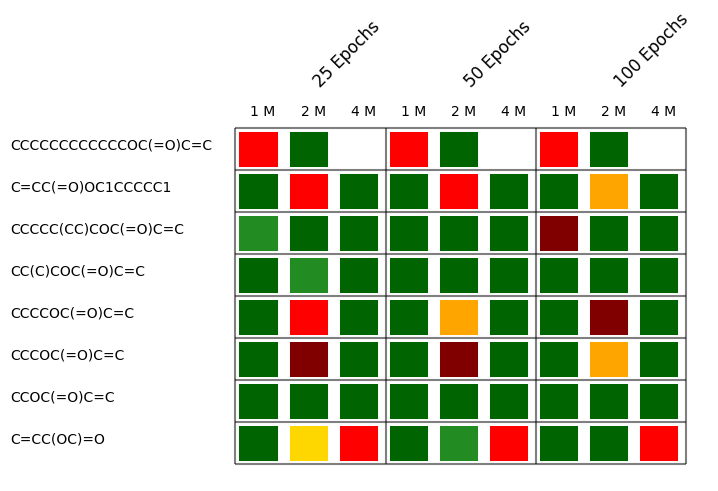

In [31]:
n_rows = len(predictions_dict)
n_cols = 3 # 3 epochs

fig, ax = plt.subplots(1,1, tight_layout = True)

ax.hlines(range(9), 0,3, colors='black', alpha = 0.5)
ax.vlines(range(4), 0,8, colors='black', alpha = 0.5)

EPOCHS_LIST = [25,50,100]

for i in range(8):
    for j, epoch in enumerate(EPOCHS_LIST):
        files = [os.path.join('predictions',file) for file in os.listdir('predictions') if file.endswith(f'_{epoch}epoch_{i}.csv')]
        if files:
          predictions_dict2 = analyze_files(files)
          for z, (molar,dic) in enumerate(predictions_dict2.items()):
               ax.add_patch(Rectangle((j + z/3, i), 0.3, 1,
                                      #boxstyle='round',
                                      edgecolor = 'white',
                                      facecolor = get_accuracy_color(dic['accuracy']),
                                      fill=True,
                                      lw=5))

ax.set_axis_off()
for i, epoch in enumerate(EPOCHS_LIST):
  ax.text(0.5 + i, 9, f'{epoch} Epochs', rotation = 45, size = 12)

for i, molar in enumerate([1,2,4]):
  for j in range(3):
    ax.text((0.1 +j + i/3), 8.3, f'{molar} M', rotation = 0)

names = {k: predictions_file(v[0]).test_monomer for k,v in predictions_dict.items()}

for i, name in names.items():
   ax.text(-1.5, i+0.5 , name)

#for i in range(3):
  #ax.text(0.1+i, 7.5 , '0.5 M', size = 5)
  #ax.text(0.1 +1/3+i, 7.5 , '1 M', size = 5)

plt.savefig('polyrate_leaveOneSetOut.pdf', bbox_inches='tight')